In [1]:
# Dataset Link - -https://www.kaggle.com/datasets/kazanova/sentiment140/data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.layers import Dense, SpatialDropout1D,LSTM
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
import nltk
import re
from nltk.corpus import stopwords
## Lemmatizer
from nltk.stem import WordNetLemmatizer

## Wordcloud
from wordcloud import WordCloud


nltk.download('stopwords')


2.16.1


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ujjwalchopra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('Dataset_Sentiment_Analysis.csv', encoding = "ISO-8859-1",names = ['polarity','id','date','query','user','text'])

In [3]:
df.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df = df.drop(['id','date','query','user'],axis=1)

In [5]:
df.head()

,polarity,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
len(df)

1600000

In [7]:
df = df.sample(frac=1)
df = df[:100000]

In [8]:
len(df)

100000

In [9]:
df['polarity'].value_counts()

polarity
0    50221
4    49779
Name: count, dtype: int64

## Therefore, data is balanced 
### 4 is the positive sentiment whereas 0 is the negative sentiment 
### Changing 4 by 1

In [10]:
df['polarity'] = df['polarity'].replace(4,1)

In [11]:
df.head()

,polarity,text
1563953,1,soo tired!my adorable c wore me out! ready to...
93490,0,i am possibly going to wheeling this weekend t...
1386634,1,all smiles over here.. .goodnight
1378737,1,"I feel my stomach rumbling, I think it's the t..."
384332,0,Damn it Nels You're not easy to support somet...


In [12]:
df.isnull().sum()

polarity    0
text        0
dtype: int64

In [13]:
df['text'] = df['text'].str.lower()

In [14]:

df['text']=df['text'].apply(lambda x:re.sub(r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)", '',x))
df['text']=df['text'].apply(lambda x: re.sub(r'@[^\s]+', '',x))
df['text']=df['text'].apply(lambda x: re.sub(r'#', '',x))
df['text']=df['text'].apply(lambda x: re.sub(r'--+', '',x))
df['text']=df['text'].apply(lambda x: re.sub(r'/', '',x))
df['text']=df['text'].apply(lambda x: re.sub(r'_', '',x))
## Remove the stopswords
df['text']=df['text'].apply(lambda x:" ".join([y for y in x.split() if y not in stopwords.words('english')]))
## Remove url 
df['text']=df['text'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))

df['text']=df['text'].apply(lambda x:re.sub('[^a-z A-z 0-9-]+', '',x))
## Remove any additional spaces
df['text']=df['text'].apply(lambda x: " ".join(x.split()))

In [15]:
df['text']

1563953    soo tiredmy adorable c wore out ready hit hay ...
93490      possibly going wheeling weekend see friends gr...
1386634                                smiles here goodnight
1378737      feel stomach rumbling think time please stomach
384332     damn nels easy support sometimes possible 11th...
                                 ...                        
495978                  doggys cheek swolllenn cuz bee stung
1579641                        pointless pathetic stfusquare
120267     damn friday spooky combos workshop booked out ...
555147                               bb bat running low good
1412762    worry exam consist two parts birth control par...
Name: text, Length: 100000, dtype: object

In [16]:
lemmatizer=WordNetLemmatizer()

In [17]:
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [18]:
df['text']=df['text'].apply(lambda x:lemmatize_words(x))

In [19]:
df['text']

1563953    soo tiredmy adorable c wore out ready hit hay ...
93490      possibly going wheeling weekend see friend gra...
1386634                                 smile here goodnight
1378737      feel stomach rumbling think time please stomach
384332     damn nels easy support sometimes possible 11th...
                                 ...                        
495978                   doggy cheek swolllenn cuz bee stung
1579641                        pointless pathetic stfusquare
120267     damn friday spooky combo workshop booked out a...
555147                               bb bat running low good
1412762    worry exam consist two part birth control part...
Name: text, Length: 100000, dtype: object

## WordCloud for Negative Tweets 

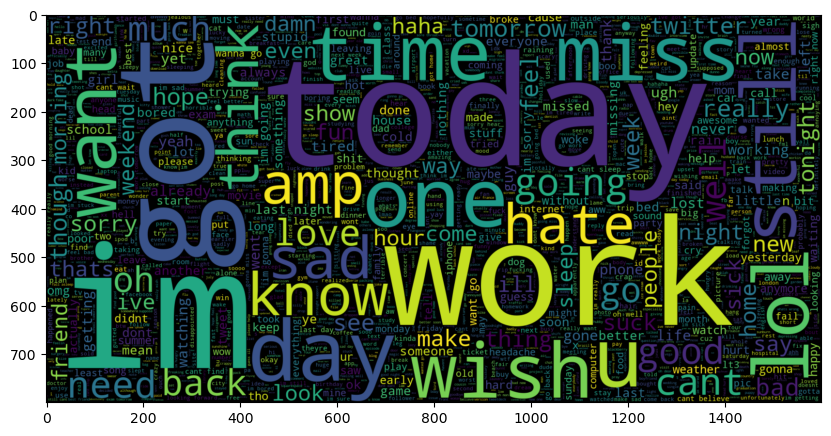

In [20]:
plt.figure(figsize = (10,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df['polarity'] == 0]['text']))
plt.imshow(wc , interpolation = 'bilinear')

# WordCloud for Positive Tweets

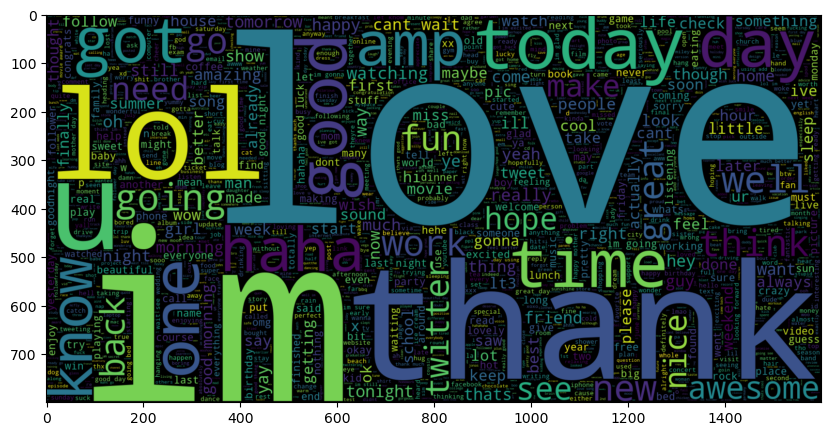

In [21]:
plt.figure(figsize = (10,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df['polarity'] == 1]['text']))
plt.imshow(wc , interpolation = 'bilinear')

# Splitting the data 

In [22]:
# df= pd.read_csv('Data_cleaned.csv')

In [29]:
df.head()

,Unnamed: 0,polarity,text
0,1491474,1,nvr3 - 55 add far - 45 go month in let go
1,97166,0,rain rain rain feel good morning wish stayed h...
2,1519402,1,lol - odd occasional odd strange knowing tweet...
3,1220317,1,hi jade yes cheer glad got twitter wagon
4,32110,0,guess ill use azureus fix utorrent compare


In [30]:
df = df.dropna()

In [31]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = CountVectorizer(max_features=1000)

In [32]:
X = tfidf.fit_transform(df['text']).toarray()

In [33]:
X.shape

(99670, 1000)

In [34]:
y = df['polarity'].values

In [35]:
y.shape

(99670,)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [46]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [49]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score ----\n')
print(accuracy_score(y_test,y_pred1))
print('\n')
print('Confusion Matrix ---\n')
print(confusion_matrix(y_test,y_pred1))
print('\n')
print('Classification Matrix ---\n')
print(classification_report(y_test,y_pred1))
print('\n')


Accuracy Score ----

0.6903280826728203


Confusion Matrix ---

[[5860 4063]
 [2110 7901]]


Classification Matrix ---

              precision    recall  f1-score   support

           0       0.74      0.59      0.66      9923
           1       0.66      0.79      0.72     10011

    accuracy                           0.69     19934
   macro avg       0.70      0.69      0.69     19934
weighted avg       0.70      0.69      0.69     19934





In [47]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score ----\n')
print(accuracy_score(y_test,y_pred2))
print('\n')
print('Confusion Matrix ---\n')
print(confusion_matrix(y_test,y_pred2))
print('\n')
print('Classification Matrix ---\n')
print(classification_report(y_test,y_pred2))
print('\n')

Accuracy Score ----

0.7288552222333701


Confusion Matrix ---

[[7425 2498]
 [2907 7104]]


Classification Matrix ---

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      9923
           1       0.74      0.71      0.72     10011

    accuracy                           0.73     19934
   macro avg       0.73      0.73      0.73     19934
weighted avg       0.73      0.73      0.73     19934





In [48]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score ----\n')
print(accuracy_score(y_test,y_pred3))
print('\n')
print('Confusion Matrix ---\n')
print(confusion_matrix(y_test,y_pred3))
print('\n')
print('Classification Matrix ---\n')
print(classification_report(y_test,y_pred3))
print('\n')

Accuracy Score ----

0.7377345239289655


Confusion Matrix ---

[[7085 2838]
 [2390 7621]]


Classification Matrix ---

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      9923
           1       0.73      0.76      0.74     10011

    accuracy                           0.74     19934
   macro avg       0.74      0.74      0.74     19934
weighted avg       0.74      0.74      0.74     19934





In [51]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [53]:
model_rf = RandomForestClassifier()

In [56]:
grid_search = GridSearchCV(estimator=model_rf, param_grid=rf_params, cv=3, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)
y_pred4 = grid_search.predict(X_test)

In [ ]:
y_pred4 = grid_search.predict(X_test)
print('Accuracy Score ----\n')
print(accuracy_score(y_test,y_pred3))
print('\n')
print('Confusion Matrix ---\n')
print(confusion_matrix(y_test,y_pred3))
print('\n')
print('Classification Matrix ---\n')
print(classification_report(y_test,y_pred3))
print('\n')

In [ ]:
grid_search.best_score_, grid_search.best_estimator_

In [ ]:
final_rf_model = 

In [ ]:
final_rf_model.fit(X_train,y_train)

In [ ]:
prediction = final_rf_model.predict(X_test)

In [ ]:
y_pred4 = final_rf_modle.predict(X_test)
print('Accuracy Score ----\n')
print(accuracy_score(y_test,y_pred3))
print('\n')
print('Confusion Matrix ---\n')
print(confusion_matrix(y_test,y_pred3))
print('\n')
print('Classification Matrix ---\n')
print(classification_report(y_test,y_pred3))
print('\n')